In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ratCoords = [0.1, 0.1]

In [4]:
direction = np.random.randint(8)
print(direction)

3


In [5]:
minCoords = [0, 0]
maxCoords = [1, 1]

def detectCollision(coords):
    return coords[0] < minCoords[0] or coords[1] < minCoords[1] or coords[0] > maxCoords[0] or coords[1] > maxCoords[1]

print(detectCollision([-0.1, 0.2]))
print(detectCollision([0.1, -0.2]))
print(detectCollision([1.1, 0.2]))
print(detectCollision([0.1, 1.2]))
print(detectCollision([0.1, 0.2]))
print(detectCollision([-0.1, -0.2]))
print(detectCollision([-1.1, 1.2]))

True
True
True
True
False
True
True


In [35]:
import math
l = 0.03
# l = math.sqrt(x**2 * 2)
# l**2 = x**2 * 2
# l**2 / 2 = x**2
# math.sqrt(l**2 / 2) = x
diagonalDelta = math.sqrt(l**2 /2)
print('diagonal travel distance: ', diagonalDelta)
positionDeltas = np.array([[0, -l], [diagonalDelta, -diagonalDelta], [l, 0], [diagonalDelta, diagonalDelta], [0, l], [-diagonalDelta, diagonalDelta], [-l, 0], [-diagonalDelta, -diagonalDelta]])
print('travel vectors by direction: ', positionDeltas)
def updatePosition(currentCoords, direction):
    return currentCoords + positionDeltas[direction]

diagonal travel distance:  0.021213203435596427
travel vectors by direction:  [[ 0.        -0.03     ]
 [ 0.0212132 -0.0212132]
 [ 0.03       0.       ]
 [ 0.0212132  0.0212132]
 [ 0.         0.03     ]
 [-0.0212132  0.0212132]
 [-0.03       0.       ]
 [-0.0212132 -0.0212132]]


[[0.1       0.07     ]
 [0.1212132 0.0787868]
 [0.13      0.1      ]
 [0.1212132 0.1212132]
 [0.1       0.13     ]
 [0.0787868 0.1212132]
 [0.07      0.1      ]
 [0.0787868 0.0787868]]


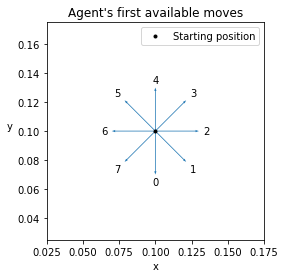

In [81]:
firstMoves = np.array([updatePosition(ratCoords, i) for i in range(0, 8)])
print(firstMoves)
plt.subplots(1, 1)
#plt.plot(firstMoves[:, 0], firstMoves[:, 1], 'o')
plt.annotate(str(0), (firstMoves[0, 0], firstMoves[0, 1]-0.005), clip_on=True, ha='center', in_layout=True, va='center', color='black')
plt.annotate(str(1), (firstMoves[1, 0]+0.005, firstMoves[1, 1]-0.005), ha='center', va='center')
plt.annotate(str(2), (firstMoves[2, 0]+0.005, firstMoves[2, 1]), ha='center', va='center')
plt.annotate(str(3), (firstMoves[3, 0]+0.005, firstMoves[3, 1]+0.005), ha='center', va='center')
plt.annotate(str(4), (firstMoves[4, 0], firstMoves[4, 1]+0.005), ha='center', va='center')
plt.annotate(str(5), (firstMoves[5, 0]-0.005, firstMoves[5, 1]+0.005), ha='center', va='center')
plt.annotate(str(6), (firstMoves[6, 0]-0.005, firstMoves[6, 1]), ha='center', va='center')
plt.annotate(str(7), (firstMoves[7, 0]-0.005, firstMoves[7, 1]-0.005), ha='center', va='center')
for color in range(8):
    plt.arrow(0.1,0.1,0.1-firstMoves[color, 0],0.1-firstMoves[color, 1], length_includes_head = True, width = 0.0005, ls='--', lw=0.001)
plt.axis([0.025, 0.175, 0.025, 0.175])
plt.plot([0.1], [0.1], 'k.')
plt.xlabel('x')
plt.ylabel('y  ', rotation=0)
plt.title('Agent\'s first available moves')
plt.legend(['Starting position'])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
startingPosition = ratCoords
currentPosition = startingPosition
history = np.array([currentPosition])
collisions = np.array([])
iteration = 0
restart = 0
while iteration < 100000:
    if (restart == 1):
        restart = 0
        iteration += 1
        currentPosition = startingPosition
        history = np.append(history, [currentPosition], axis=0)
        collisions = np.append(collisions, False)
        continue
    newDirection = math.floor(np.random.random_integers(8)) #geometric(p=0.15) % 8 + 1)
    currentPosition = updatePosition(currentPosition, newDirection)
    history = np.append(history, [currentPosition], axis=0)
    hasCollision = detectCollision(currentPosition)
    collisions = np.append(collisions, hasCollision)
    if (hasCollision):
        restart = 1
    iteration += 1


In [ ]:
plt.plot(collisions)

In [ ]:
plt.plot(history[:, 0], history[:, 1])

In [ ]:
history

In [ ]:
reward = 0
rewards = np.array([])
for histPoint in history:
    if detectCollision(histPoint):
        reward -= 2
        rewards = np.append(rewards, -2)
    elif detectGoal(histPoint):
        reward += 10
        rewards = np.append(rewards, 10)
    else:
        rewards = np.append(rewards, 0)
print('not np avg: ', reward / len(history))
print('avg: ', np.average(rewards))
print('median: ', np.median(rewards))

plt.hist(rewards)
plt.show()
plt.pie([np.sum(rewards==0), np.sum(rewards==-2),np.sum(rewards==10)])
plt.show()
successRate = np.sum(rewards==10) / len(rewards) * 100
neutralRate = np.sum(rewards==0) / len(rewards) * 100
failRate = np.sum(rewards==-2) / len(rewards) * 100
print('fail rate: ', failRate)
print('success rate: ', successRate)
print('neutral rate: ', neutralRate)

In [ ]:
plt.hist(collisions)
plt.show()

In [ ]:
import math
2*math.pi*8/8


In [ ]:
def detectGoal(coords):
	return np.sqrt((coords[0]-0.8)**2 + (coords[1]-0.8)**2) <= 0.1
print('[0.1212132, 0.0787868]: ',detectGoal([0.1212132, 0.0787868]))
print('[0.1212132, 0.1212132]: ',detectGoal([0.1212132, 0.1212132]))
print('[0.1, 0.1]: ',detectGoal([0.1, 0.1]))
print('[0.8, 0.8]: ',detectGoal([0.8, 0.8]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

axisSize = 20
weights = np.array(np.random.rand(axisSize * axisSize, 8), dtype=np.float64)
xDelta = 1 / (axisSize - 1)
axis = [(j % axisSize) * xDelta for j in range(axisSize)]

x = axis
y = axis

X,Y = np.meshgrid(x,y)
weights[1,3] = 2
maxElements = [np.amax(weights[i,:]) for i in range(axisSize*axisSize)]
maxElement = np.amax(maxElements)
maxIndexes = [np.random.choice(np.where(weights[i,:] == maxElements[i])[0]) for i in range(axisSize*axisSize)]
def convertIndexToX(i):
    return np.array([0,1, 1,1,0,-1,-1,-1])[i]
def convertIndexToY(i):
    return np.array([-1,-1, 0, 1, 1, 1, 0, -1])[i]
u = np.array([convertIndexToX(maxIndexes[:])])
v = np.array([convertIndexToY(maxIndexes[:])])
# u = np.multiply([convertIndexToX(maxIndexes[:])], (maxElements / maxElement))
# v = np.multiply([convertIndexToY(maxIndexes[:])], (maxElements / maxElement))


fig, ax = plt.subplots(figsize=(9,9))


ax.quiver(X,Y,u,v, scale=2*axisSize, scale_units='xy')


ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([-0.1, 1.1, -0.1, 1.1])
ax.set_aspect('equal')
rectangle = plt.Rectangle((0,0), 1, 1, ec='blue', fc='none')
plt.gca().add_patch(rectangle)


plt.show()

In [ ]:
import numpy as np
from src.sarsa import cellCoordsByIndex, getCellIndex

print(cellCoordsByIndex(0, 20, 20, 1/19, 1/19))
print(cellCoordsByIndex(1, 20, 20, 1/19, 1/19))
print(cellCoordsByIndex(2, 20, 20, 1/19, 1/19))
print(cellCoordsByIndex(20, 20, 20, 1/19, 1/19))
print(cellCoordsByIndex(21, 20, 20, 1/19, 1/19))
print(getCellIndex([0.0, 0.0]))
print(getCellIndex(np.array([0.05263157894736842, 0.0])))
print(getCellIndex([0.20526315789473684, 0.6]))
print(getCellIndex([0.0, 0.05263157894736842]))
print(getCellIndex([0.05263157894736842, 0.05263157894736842]))


print(getCellIndex(cellCoordsByIndex(0, 20, 20, 1/19, 1/19)))
print(getCellIndex(cellCoordsByIndex(1, 20, 20, 1/19, 1/19)))
print(getCellIndex(cellCoordsByIndex(2, 20, 20, 1/19, 1/19)))
print(getCellIndex(cellCoordsByIndex(20, 20, 20, 1/19, 1/19)))
print(getCellIndex(cellCoordsByIndex(21, 20, 20, 1/19, 1/19)))

In [ ]:
from src.sarsa import generateCoordsArray
print(generateCoordsArray(20,20)[1][0])

In [ ]:
import numpy as np
from src.sarsa import generateCoordsArray, calculatePlaceCellActivity, updateWeights
placeCellCoords = generateCoordsArray(2,2)
def calculateOutputNeuronActivityForDirection(ratCoords, direction, weights):
	return np.sum(np.multiply(weights[:, direction], calculatePlaceCellActivity(ratCoords, placeCellCoords)))

weights = np.array([[1,2],[3,4],[5,6],[7,8]], dtype=np.float128)
eligibilityTrace = np.array([[0,0],[0,0],[0,0],[0,0]], dtype=np.float128)
ratCoords=[0,0]
print(calculatePlaceCellActivity(ratCoords, placeCellCoords))
print(weights[:, 1])

print(np.multiply(weights[:, 1], calculatePlaceCellActivity(ratCoords, placeCellCoords)))
print(np.sum(np.multiply(weights[:, 1], calculatePlaceCellActivity(ratCoords, placeCellCoords))))
print(calculateOutputNeuronActivityForDirection(ratCoords, 1, weights))
eligibilityTrace = np.array([[1,0],[0,0],[0,0],[0,0]], dtype=np.float128)
updateWeights(-2, weights, eligibilityTrace)
print(weights)

In [ ]:
weights = np.array(np.random.rand(2 * 2, 3), dtype=np.float128)
print(weights)

In [ ]:
import math
l = 1
diagonalDelta = math.sqrt(l**2/2)
diagonalDelta

In [ ]:
(0.5 - 0.01) / 50

In [ ]:
0.5 - 0.0098*50

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ratsDurationData = np.zeros([10, 50])
ratsRewardData = np.zeros([10, 50])
for i in range(10):
    [trialGoalHistory, trialDurationHistory, trialRewardHistory] = np.asarray(np.loadtxt('output-4/'+str(i)+'/testTrial.csv', delimiter=","))
    ratsDurationData[i, :] = trialDurationHistory
    ratsRewardData[i, :] = trialRewardHistory

avgDurationPerTrial = np.mean(ratsDurationData, 0)
stdDurationPerTrial = np.std(ratsDurationData, 0)
print('first trial per rat: ', ratsDurationData[:, 0])
print('std[0]: ', stdDurationPerTrial[0])
print('max[0, :]: ', np.max(ratsDurationData[:, 0]))
print('min[0, :]: ', np.min(ratsDurationData[:, 0]))

avgRewardPerTrial = np.mean(ratsRewardData, 0)
stdRewardPerTrial = np.std(ratsRewardData, 0)

t = np.arange(50)

plt.plot(avgDurationPerTrial, color='#A93226')
plt.fill_between(t, avgDurationPerTrial+stdDurationPerTrial, avgDurationPerTrial-stdDurationPerTrial, facecolor='#A93226', alpha=0.2)
plt.show()
plt.close()


plt.plot(avgRewardPerTrial, color='black')
plt.fill_between(t, avgRewardPerTrial+stdRewardPerTrial, avgRewardPerTrial-stdRewardPerTrial, facecolor='black', alpha=0.25)
plt.show()
plt.close()


In [ ]:
np.loadtxt('output/0/testTrial.csv',  delimiter=",")

In [ ]:
coords = np.array([])
coords = np.append(coords, [0.1, 0.1])
coords = np.append(coords, [0.5, 0.5])
coords = np.append(coords, [1, 1])
print(np.reshape(coords, (-1, 2)))

In [ ]:
"""
=========================
Simple animation examples
=========================

Two animations where the first is a random walk plot and
the second is an image animation.
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

###############################################################################

fig1 = plt.figure()

# Fixing random state for reproducibility
np.random.seed(19680801)

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')
HTML(line_ani.to_jshtml())

###############################################################################

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

rc('animation', html='jshtml')


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

###############################################################################

fig1 = plt.figure()

# Fixing random state for reproducibility
np.random.seed(19680801)

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')
# HTML(line_ani.to_jshtml())
line_ani

In [ ]:
import math
l = 0.03
diagonalDelta = math.sqrt(2*l**2)
diagonalDelta

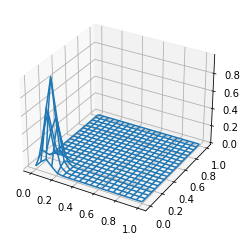

In [2]:
import src.scripts.sarsa as sarsa
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import math
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

xAxisSteps = 20
yAxisSteps = 20
ratCoords = [0.1, 0.1]
placeCellCoords = sarsa.generateCoordsArray(xAxisSteps, yAxisSteps)
Z = sarsa.calculatePlaceCellActivity(ratCoords, placeCellCoords)
# X = placeCellCoords[:,1]
# Y = placeCellCoords[:,0]
# print(X)

Zshape = np.reshape(Z, [20, 20])


axisSize = 20
xDelta = 1 / (axisSize - 1)
axis = [(j % axisSize) * xDelta for j in range(axisSize)]

x = axis
y = axis

X,Y = np.meshgrid(x,y)
Z = Zshape

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, cmap=cm.coolwarm)
plt.show()

In [30]:
np.sort(np.reshape(Z, [1, 400]))[0,-13:]

array([0.08640122, 0.08640122, 0.13458758, 0.13458758, 0.26165715,
       0.32656915, 0.32656915, 0.40758453, 0.50869825, 0.50869825,
       0.63489628, 0.63489628, 0.98898083])

In [ ]:
np.sum(Z)

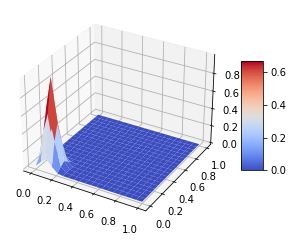

In [31]:
plt.close()
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
import matplotlib; print(matplotlib.__version__)

In [ ]:
import numpy as np
import pandas as pd

dist_all = pd.DataFrame([[1, 0],[2,0]])
aux = {}
for j in dist_all.columns:
    for i in dist_all.index:
        if dist_all.loc[i,j]<25:
            aux[j] = np.append(aux[j],i)

In [ ]:
aux

In [ ]:
np.array(())

In [3]:
import numpy as np
import math
import src.sarsa as sarsa

ratCoords = [0,0]
placeCellCoords = sarsa.generateCoordsArray(5,5)
activityLooped = sarsa.calculatePlaceCellActivity(ratCoords, placeCellCoords)

In [4]:
print(activityLooped)

[1.00000000e+000 3.72665317e-006 1.92874985e-022 1.38634329e-049
 1.38389653e-087 3.72665317e-006 1.38879439e-011 7.18778174e-028
 5.16642063e-055 5.15730238e-093 1.92874985e-022 7.18778174e-028
 3.72007598e-044 2.67390942e-071 2.66919022e-109 1.38634329e-049
 5.16642063e-055 2.67390942e-071 1.92194773e-098 1.91855567e-136
 1.38389653e-087 5.15730238e-093 2.66919022e-109 1.91855567e-136
 1.91516960e-174]


In [7]:
sigma = 0.05
np.exp(-((placeCellCoords[:,0]-ratCoords[0])**2 + (placeCellCoords[:,1]-ratCoords[1])**2) / (2 * sigma**2))

array([1.00000000e+000, 3.72665317e-006, 1.92874985e-022, 1.38634329e-049,
       1.38389653e-087, 3.72665317e-006, 1.38879439e-011, 7.18778174e-028,
       5.16642063e-055, 5.15730238e-093, 1.92874985e-022, 7.18778174e-028,
       3.72007598e-044, 2.67390942e-071, 2.66919022e-109, 1.38634329e-049,
       5.16642063e-055, 2.67390942e-071, 1.92194773e-098, 1.91855567e-136,
       1.38389653e-087, 5.15730238e-093, 2.66919022e-109, 1.91855567e-136,
       1.91516960e-174])

In [1]:
t = None
(1,2)[t is None]

2

In [4]:

import os
import numpy as np

results = [{'espilon': 0.5, 'numSteps': np.array([1,2,3]), 'rewards': np.array([10, 10, 10])}]
os.makedirs('output/epsilons', exist_ok=True)
file = 'output/epsilons/results.json.npy'
np.save(file, results) 

In [6]:
read_dictionary = np.load(file,allow_pickle='TRUE').item()
print(read_dictionary) # displays "world"

{'espilon': 0.5, 'numSteps': array([1, 2, 3]), 'rewards': array([10, 10, 10])}


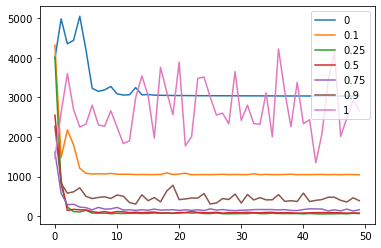

In [23]:
file = 'output/epsilons/results.npy'
read_dictionary = np.load(file,allow_pickle='TRUE')

import matplotlib.pyplot as plt
for result in read_dictionary:
    plt.plot(range(50), np.mean(result['numSteps'], axis=0), label = result['epsilon'])
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

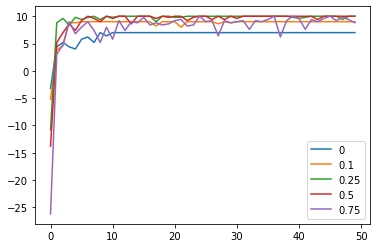

In [29]:
for result in read_dictionary[:-2]:
    plt.plot(range(50), np.mean(result['rewards'], axis=0), label = result['epsilon'])
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [25]:
file = 'output/epsilons/results.npy'
read_dictionary = np.load(file,allow_pickle='TRUE')

In [10]:
len(read_dictionary)

7

In [16]:
read_dictionary[0].keys()

dict_keys(['epsilon', 'numSteps', 'rewards'])

In [17]:
read_dictionary[0]["epsilon"]

0

In [19]:
np.mean(read_dictionary[0]['numSteps'], axis=1)

array([  307.92,   274.08,  9847.82,   169.54,   159.84, 10000.  ,
        9874.58,   249.66,  1323.62,   151.1 ])

In [27]:
np.mean(read_dictionary[0]['rewards'], axis=0)

array([-3.2,  4.4,  5.2,  4.4,  4. ,  5.8,  6.2,  5.2,  7. ,  6.4,  7. ,
        7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,
        7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,
        7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. ,
        7. ,  7. ,  7. ,  7. ,  7. ,  7. ])

(400, 2)


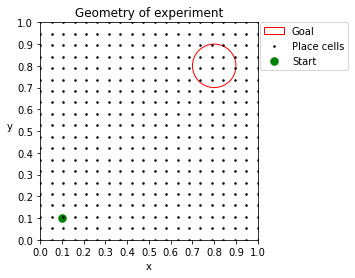

In [11]:
_, ax = plt.subplots()
#rectangle2 = plt.Rectangle((0, 0), 1, 1, ec='black', fc='none')
#plt.gca().add_patch(rectangle2)
start, = plt.plot([0.1], [0.1], 'g.', label='Start', markersize=15)
#ax.xaxis.set_ticks([])
#ax.yaxis.set_ticks([])
#ax.axis([-0.1, 1.1, -0.1, 1.1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
print(placeCellCoords.shape)
cells, = plt.plot(placeCellCoords[:,0], placeCellCoords[:,1], 'k.', markersize=3, label='Place cells')
ax.axis([0,1,0,1])
ax.set_aspect('equal')
circle1 = plt.Circle((0.8, 0.8), 0.1, color='r', fill=False, label='Goal')
plt.gcf().gca().add_artist(circle1)
plt.xlabel('x')
plt.ylabel('y  ', rotation=0)
plt.title('Geometry of experiment')
plt.legend(handles = [circle1, cells, start], bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.show()

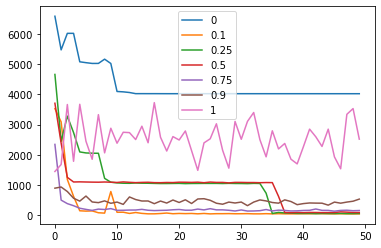

In [6]:
import numpy as np
file = 'output/epsilons/results.npy'
read_dictionary = np.load(file,allow_pickle='TRUE')

import matplotlib.pyplot as plt
for result in read_dictionary:
    plt.plot(range(50), np.mean(result['numSteps'], axis=0), label = result['epsilon'])
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

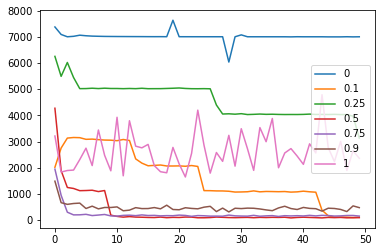

In [3]:
import numpy as np
file = 'output/zero_weight_init/epsilons/results.npy'
read_dictionary = np.load(file,allow_pickle='TRUE')

import matplotlib.pyplot as plt
for result in read_dictionary:
    plt.plot(range(50), np.mean(result['numSteps'], axis=0), label = result['epsilon'])
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

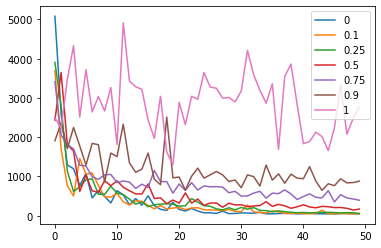

In [4]:
import numpy as np
file = 'output/rand_weight_init_0_1/epsilons/results.npy'
read_dictionary = np.load(file,allow_pickle='TRUE')

import matplotlib.pyplot as plt
for result in read_dictionary:
    plt.plot(range(50), np.mean(result['numSteps'], axis=0), label = result['epsilon'])
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [9]:
arr = np.array([0,0,1,1,2,1,2,2])
maxElement = np.amax(arr)
maxIndexes = np.where(arr == maxElement)
# pick random index when several share maxValue
randomFromMaxIndexes = np.random.choice(maxIndexes[0])

In [12]:
randomFromMaxIndexes
maxIndexes[0]

array([4, 6, 7])

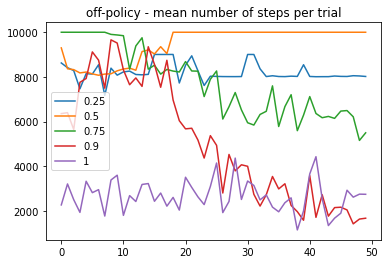

In [4]:
import numpy as np
file = 'output/off_policy/epsilons/results.npy'
read_dictionary = np.load(file,allow_pickle='TRUE')

import matplotlib.pyplot as plt
for result in read_dictionary:
    plt.plot(range(50), np.mean(result['numSteps'], axis=0), label = result['epsilon'])
# show a legend on the plot
plt.legend()
plt.title('off-policy - mean number of steps per trial')
# Display a figure.
plt.show()

In [5]:
import numpy as np
file = 'output/off_policy/epsilons/results.npy'
read_dictionary = np.load(file,allow_pickle='TRUE')

import matplotlib.pyplot as plt
for result in read_dictionary:
    plt.plot(range(50), np.mean(result['rewards'], axis=0), label = result['epsilon'])
# show a legend on the plot
plt.legend()
plt.title('off-policy - integrated reward')
# Display a figure.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'output/off_policy/epsilons/results.npy'

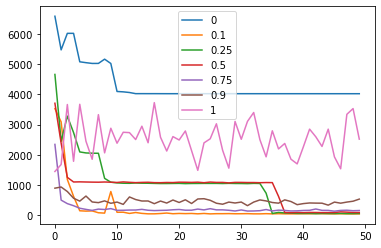

In [7]:
import numpy as np
file = 'output/epsilons/results.npy'
read_dictionary = np.load(file,allow_pickle='TRUE')

import matplotlib.pyplot as plt
for result in read_dictionary:
    plt.plot(range(50), np.mean(result['numSteps'], axis=0), label = result['epsilon'])
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

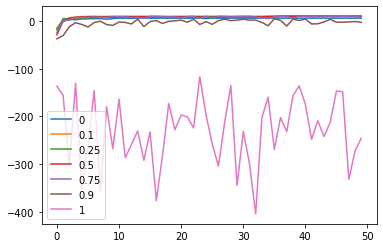

In [9]:
import numpy as np
file = 'output/epsilons/results.npy'
read_dictionary = np.load(file,allow_pickle='TRUE')

import matplotlib.pyplot as plt
for result in read_dictionary:
    plt.plot(range(50), np.mean(result['rewards'], axis=0), label = result['epsilon'])
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [19]:
read_dictionary.map()

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [26]:
avgR = [{e['epsilon']: np.mean(e['rewards'][-10:]) for e in read_dictionary}]

In [27]:
avgN = [{e['epsilon']: np.mean(e['numSteps'][-10:]) for e in read_dictionary}]

In [58]:
file = 'output/epsilons/expDecay/results.npy'
read_dictionaryExp = np.load(file,allow_pickle='TRUE').tolist()

#avgR = [*avgR, {read_dictionaryExp['epsilon']: np.mean(read_dictionaryExp['rewards'][-10:])}]
avgR[0][read_dictionaryExp['epsilon']] = np.mean(read_dictionaryExp['rewards'][-10:])
avgN[0][read_dictionaryExp['epsilon']] = np.mean(read_dictionaryExp['numSteps'][-10:])

In [61]:
file = 'output/epsilons/logDecay/results.npy'
read_dictionaryLog = np.load(file,allow_pickle='TRUE').tolist()

#avgR = [*avgR, {read_dictionaryExp['epsilon']: np.mean(read_dictionaryExp['rewards'][-10:])}]
avgR[0][read_dictionaryLog['epsilon']] = np.mean(read_dictionaryLog['rewards'][-10:])
avgN[0][read_dictionaryLog['epsilon']] = np.mean(read_dictionaryLog['numSteps'][-10:])

In [64]:
file = 'output/epsilons/linearDecay1-0/results.npy'
read_dictionaryLin = np.load(file,allow_pickle='TRUE').tolist()

#avgR = [*avgR, {read_dictionaryExp['epsilon']: np.mean(read_dictionaryExp['rewards'][-10:])}]
avgR[0][read_dictionaryLin['epsilon']] = np.mean(read_dictionaryLin['rewards'][-10:])
avgN[0][read_dictionaryLin['epsilon']] = np.mean(read_dictionaryLin['numSteps'][-10:])

In [65]:
avgN

[{0: 4313.656,
  0.1: 238.868,
  0.25: 1013.106,
  0.5: 901.466,
  0.75: 227.1,
  0.9: 472.264,
  1: 2507.414,
  'exp': 163.926,
  'log': 362.674,
  'linear_decay': 248.088}]

In [66]:
avgR

[{0: 5.112,
  0.1: 9.204,
  0.25: 8.328,
  0.5: 8.028,
  0.75: 7.604,
  0.9: -3.492,
  1: -230.584,
  'exp': 5.508,
  'log': -7.82,
  'linear_decay': -1.644}]

In [8]:
import numpy as np
file = 'output/epsilons/results.npy'
rd = np.load(file,allow_pickle='TRUE')
file = 'output/epsilons/expDecay/results.npy'
rdexp = np.load(file,allow_pickle='TRUE').tolist()
file = 'output/epsilons/logDecay/results.npy'
rdlog = np.load(file,allow_pickle='TRUE').tolist()
file = 'output/epsilons/linearDecay1-0/results.npy'
rdlin = np.load(file,allow_pickle='TRUE').tolist()
all_data = [*rd, rdexp, rdlog, rdlin]

In [87]:
avgR1 = [{e['epsilon']: np.mean(e['rewards'][:,-1:]) for e in all_data}]
avgN1 = [{e['epsilon']: np.mean(e['numSteps'][:,-1:]) for e in all_data}]
avgR2 = [{e['epsilon']: np.mean(e['rewards'][:,-2:]) for e in all_data}]
avgN2 = [{e['epsilon']: np.mean(e['numSteps'][:,-2:]) for e in all_data}]
avgR5 = [{e['epsilon']: np.mean(e['rewards'][:,-5:]) for e in all_data}]
avgN5 = [{e['epsilon']: np.mean(e['numSteps'][:,-5:]) for e in all_data}]
avgR10 = [{e['epsilon']: np.mean(e['rewards'][:,-10:]) for e in all_data}]
avgN10 = [{e['epsilon']: np.mean(e['numSteps'][:,-10:]) for e in all_data}]

In [85]:
avgR2

[{0: 6.0,
  0.1: 10.0,
  0.25: 10.0,
  0.5: 10.0,
  0.75: 8.8,
  0.9: -1.9,
  1: -259.0,
  'exp': 10.0,
  'log': 10.0,
  'linear_decay': 10.0}]

In [86]:
avgN2

[{0: 4024.6,
  0.1: 43.75,
  0.25: 55.7,
  0.5: 90.7,
  0.75: 152.75,
  0.9: 498.85,
  1: 3026.25,
  'exp': 53.3,
  'log': 32.0,
  'linear_decay': 34.85}]

In [90]:
avgN10

[{0: 4024.7,
  0.1: 47.91,
  0.25: 56.15,
  0.5: 92.32,
  0.75: 160.95,
  0.9: 418.99,
  1: 2570.99,
  'exp': 54.66,
  'log': 42.97,
  'linear_decay': 38.88}]

In [91]:
avgR10

[{0: 6.0,
  0.1: 10.0,
  0.25: 10.0,
  0.5: 9.86,
  0.75: 9.38,
  0.9: -1.72,
  1: -223.12,
  'exp': 10.0,
  'log': 10.0,
  'linear_decay': 10.0}]

In [92]:
avgR5

[{0: 6.0,
  0.1: 10.0,
  0.25: 10.0,
  0.5: 9.76,
  0.75: 9.44,
  0.9: -2.16,
  1: -228.96,
  'exp': 10.0,
  'log': 10.0,
  'linear_decay': 10.0}]

In [93]:
avgN5

[{0: 4024.64,
  0.1: 45.02,
  0.25: 56.08,
  0.5: 96.74,
  0.75: 152.76,
  0.9: 453.24,
  1: 2573.04,
  'exp': 53.76,
  'log': 35.74,
  'linear_decay': 36.18}]

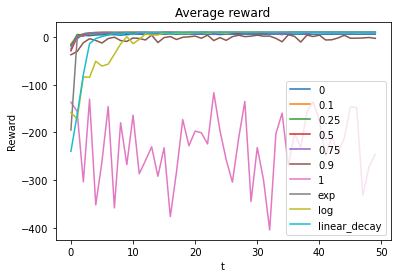

In [126]:
import matplotlib.pyplot as plt
for result in all_data:
    plt.plot(range(50), np.mean(result['rewards'], axis=0), label = result['epsilon'])
# show a legend on the plot
plt.title('Average reward')
plt.xlabel('t')
plt.ylabel('Reward')
plt.legend()
# Display a figure.
plt.show()

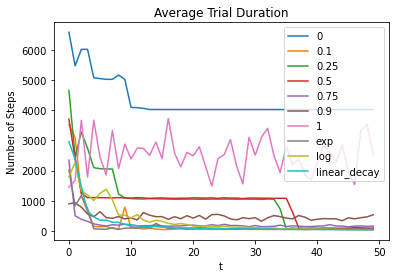

In [129]:
import matplotlib.pyplot as plt
for result in all_data:
    plt.plot(range(50), np.mean(result['numSteps'], axis=0), label = result['epsilon'])
# show a legend on the plot
plt.title('Average Trial Duration')
plt.xlabel('t')
plt.ylabel('Number of Steps')
plt.legend()
# Display a figure.
plt.show()

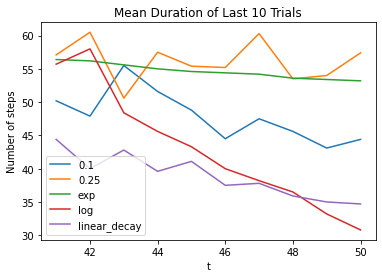

In [127]:
import matplotlib.pyplot as plt
for result in all_data:
    if result['epsilon'] in [0,0.5,0.75,0.9,1]:
        continue
    plt.plot(range(41,51), np.mean(result['numSteps'][:,-10:],axis=0), label = result['epsilon'])
# show a legend on the plot
plt.legend()
plt.title('Average Duration of Last 10 Trials')
plt.xlabel('t')
plt.ylabel('Number of steps')
# Display a figure.
plt.show()

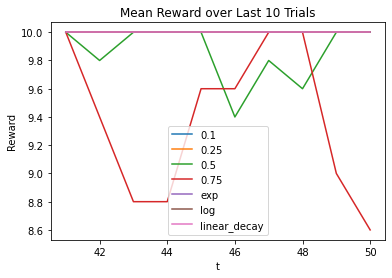

In [128]:
import matplotlib.pyplot as plt
for result in all_data:
    if result['epsilon'] in [0,0.9,1]:
        continue
    plt.plot(range(41,51), np.mean(result['rewards'][:,-10:],axis=0), label = result['epsilon'])
# show a legend on the plot
plt.legend()
plt.title('Average Reward over Last 10 Trials')
plt.xlabel('t')
plt.ylabel('Reward')
# Display a figure.
plt.show()

In [119]:
avgN2

[{0: 4024.6,
  0.1: 43.75,
  0.25: 55.7,
  0.5: 90.7,
  0.75: 152.75,
  0.9: 498.85,
  1: 3026.25,
  'exp': 53.3,
  'log': 32.0,
  'linear_decay': 34.85}]

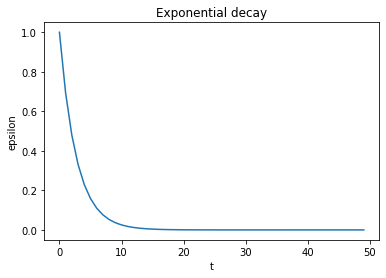

In [122]:
import math
aray = []
for j in range(50):
    value = math.exp(-j/math.exp(1))
    aray = [*aray, value]
plt.plot(aray)
plt.title('Exponential decay')
plt.xlabel('t')
plt.ylabel('epsilon')
plt.show()

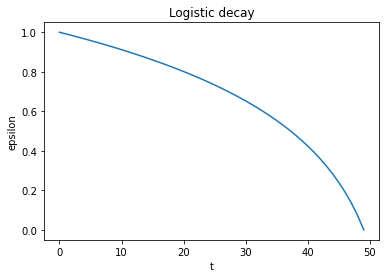

In [123]:
import math
aray = []
for j in range(50):
    value = math.log(10-(10-1)*(j/49), 10)
    aray = [*aray, value]
plt.plot(aray)
plt.title('Logistic decay')
plt.xlabel('t')
plt.ylabel('epsilon')
plt.show()

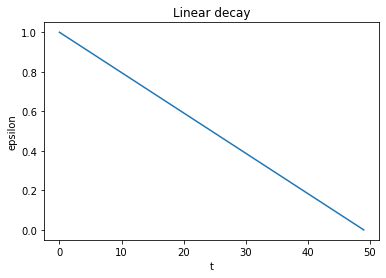

In [124]:
import math
aray = []
for j in range(50):
    value = 1-1/49*j
    aray = [*aray, value]
plt.plot(aray)
plt.title('Linear decay')
plt.xlabel('t')
plt.ylabel('epsilon')
plt.show()

In [3]:
import numpy as np
file = 'output/noEligibilityTrace/epsilons/results.npy'
no_elig = np.load(file,allow_pickle='TRUE')

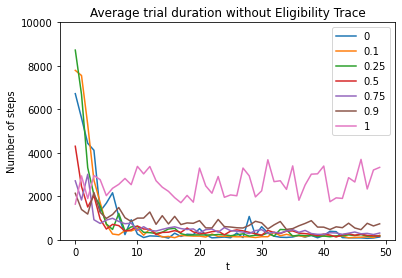

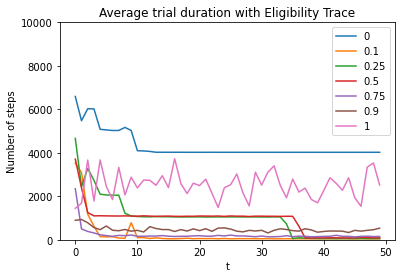

In [39]:


import matplotlib.pyplot as plt
for result in no_elig:
    plt.plot(range(50), np.mean(result['numSteps'], axis=0), label = result['epsilon'])
plt.title('Average trial duration without Eligibility Trace')
plt.xlabel('t')
plt.ylabel('Number of steps')
plt.ylim(0, 10000)
plt.legend()
plt.show()
for result in all_data:
    if result['epsilon'] in [0,0.1,0.25,0.5,0.75,0.9,1]:
        plt.plot(range(50), np.mean(result['numSteps'], axis=0), label = result['epsilon'])   
plt.title('Average trial duration with Eligibility Trace')
plt.xlabel('t')
plt.ylabel('Number of steps')
plt.ylim(0, 10000)
plt.legend()
# Display a figure.
plt.show()

In [16]:
import numpy as np

d = 'output/epsilons/0.5/{}/weights/'
for t in [0, 50]:
    w = np.loadtxt(d(t)'.csv', delimiter=",")
    axisSize = 20
    xDelta = 1 / (axisSize - 1)
    axis = [(j % axisSize) * xDelta for j in range(axisSize)]

    x = axis
    y = axis

    X, Y = np.meshgrid(x, y)

    maxElements = [np.amax(w[i, :]) for i in range(axisSize*axisSize)]
    maxElement = np.amax(maxElements)
    maxIndexes = [np.random.choice(np.where(w[i, :] == maxElements[i])[
                                   0]) for i in range(axisSize*axisSize)]

    def convertIndexToX(i):
        return np.array([0, 0.7, 1, 0.7, 0, -0.7, -1, -0.7])[i]

    def convertIndexToY(i):
        return np.array([-1, -0.7, 0, 0.7, 1, 0.7, 0, -0.7])[i]
    u = [convertIndexToX(maxIndexes[:])]
    v = [convertIndexToY(maxIndexes[:])]
    _, ax = plt.subplots()
    rectangle = plt.Rectangle((0, 0), 1, 1, ec='blue', fc='none')
    plt.gca().add_patch(rectangle)
    circle2 = plt.Circle((0.8, 0.8), 0.1, color='r', fill=False)
    ax.add_artist(circle2)
    plt.plot([0.1], [0.1], 'rx')
    ax.quiver(X, Y, u, v)
    # ax.quiver(X,Y,u,v, scale=2*axisSize, scale_units='xy')
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis([-0.1, 1.1, -0.1, 1.1])
    ax.set_aspect('equal')
    plt.savefig('images/quiver/trial_' + str(t) + '.svg')
    plt.close()

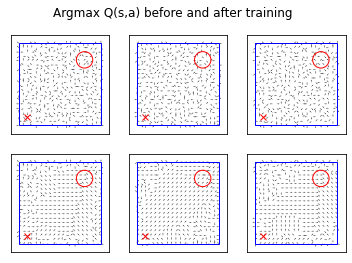

In [34]:
def d(id, wid):
 return f'output/epsilons/0.5/{id}/weights/{wid}.csv'
fig, ax = plt.subplots(2,3)

axisSize = 20
xDelta = 1 / (axisSize - 1)
axis = [(j % axisSize) * xDelta for j in range(axisSize)]
x = axis
y = axis
X, Y = np.meshgrid(x, y)
for id in [0,1,2]:
    for t in [0, 50]:
        w = np.loadtxt(d(id, t), delimiter=",")


        maxElements = [np.amax(w[i, :]) for i in range(axisSize*axisSize)]
        maxElement = np.amax(maxElements)
        maxIndexes = [np.random.choice(np.where(w[i, :] == maxElements[i])[
                                    0]) for i in range(axisSize*axisSize)]

        def convertIndexToX(i):
            return np.array([0, 0.7, 1, 0.7, 0, -0.7, -1, -0.7])[i]

        def convertIndexToY(i):
            return np.array([-1, -0.7, 0, 0.7, 1, 0.7, 0, -0.7])[i]
        u = [convertIndexToX(maxIndexes[:])]
        v = [convertIndexToY(maxIndexes[:])]
        rectangle = plt.Rectangle((0, 0), 1, 1, ec='blue', fc='none')
        circle2 = plt.Circle((0.8, 0.8), 0.1, color='r', fill=False)
        a = ax[(0,1)[t==50], id]
        a.add_patch(rectangle)
        a.add_artist(circle2)
        a.plot([0.1], [0.1], 'rx')
        a.quiver(X, Y, u, v)
        # ax.quiver(X,Y,u,v, scale=2*axisSize, scale_units='xy')
        a.xaxis.set_ticks([])
        a.yaxis.set_ticks([])
        a.axis([-0.1, 1.1, -0.1, 1.1])
        a.set_aspect('equal')
#fig.tight_layout()
fig.suptitle('Argmax Q(s,a) before and after training')
plt.savefig('images/quiver/multi.svg')
plt.show()


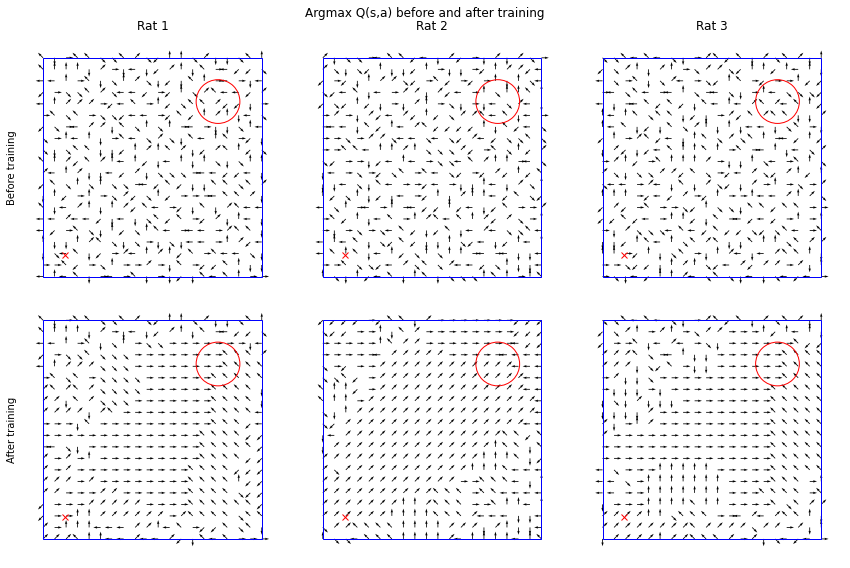

In [78]:

import matplotlib.gridspec as gridspec
# gridspec inside gridspec
f = plt.figure(figsize=(12,8))

gs0 = gridspec.GridSpec(1, 3, figure=f)

# rat 1
gs00 = gs0[0].subgridspec(2, 1,wspace=0, hspace=0)

ax1 = f.add_subplot(gs00[0], frameon=False, title='Rat 1', ylabel='Before training')

ax2 = f.add_subplot(gs00[1], frameon=False, ylabel='After training')

# rat 2
gs01 = gs0[1].subgridspec(2, 1,wspace=0, hspace=0)

ax3 = f.add_subplot(gs01[0], frameon=False, title='Rat 2')
ax4 = f.add_subplot(gs01[1], frameon=False)

# rat 3
gs02 = gs0[2].subgridspec(2, 1,wspace=0, hspace=0)

ax5 = f.add_subplot(gs02[0], frameon=False, title='Rat 3')
ax6 = f.add_subplot(gs02[1], frameon=False)

axs = [[ax1, ax2], [ax3, ax4], [ax5, ax6]]

axisSize = 20
xDelta = 1 / (axisSize - 1)
axis = [(j % axisSize) * xDelta for j in range(axisSize)]
x = axis
y = axis
X, Y = np.meshgrid(x, y)
for id in [0,1,2]:
    for t in [0, 50]:
        w = np.loadtxt(d(id, t), delimiter=",")


        maxElements = [np.amax(w[i, :]) for i in range(axisSize*axisSize)]
        maxElement = np.amax(maxElements)
        maxIndexes = [np.random.choice(np.where(w[i, :] == maxElements[i])[
                                    0]) for i in range(axisSize*axisSize)]

        def convertIndexToX(i):
            return np.array([0, 0.7, 1, 0.7, 0, -0.7, -1, -0.7])[i]

        def convertIndexToY(i):
            return np.array([-1, -0.7, 0, 0.7, 1, 0.7, 0, -0.7])[i]
        u = [convertIndexToX(maxIndexes[:])]
        v = [convertIndexToY(maxIndexes[:])]
        rectangle = plt.Rectangle((0, 0), 1, 1, ec='blue', fc='none')
        circle2 = plt.Circle((0.8, 0.8), 0.1, color='r', fill=False)
        a = axs[id][(0,1)[t==50]]
        a.add_patch(rectangle)
        a.add_artist(circle2)
        a.plot([0.1], [0.1], 'rx')
        a.quiver(X, Y, u, v)
        # ax.quiver(X,Y,u,v, scale=2*axisSize, scale_units='xy')
        a.xaxis.set_ticks([])
        a.yaxis.set_ticks([])
        a.axis([-0.1, 1.1, -0.1, 1.1])
        a.set_aspect('equal')
plt.xticks([])
plt.yticks([])


plt.suptitle('Argmax Q(s,a) before and after training')

f.tight_layout()
plt.savefig('images/quiver/multi.svg')
plt.show()

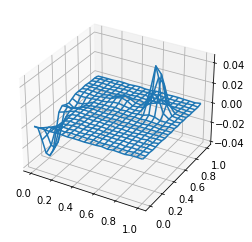

In [96]:
import src.scripts.sarsa as sarsa
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import math
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

xAxisSteps = 20
yAxisSteps = 20
ratCoords = [0.1, 0.1]
placeCellCoords = sarsa.generateCoordsArray(xAxisSteps, yAxisSteps)
w = np.loadtxt(d(0, 1), delimiter=",")
Z = w[:,4]
#Z = sarsa.calculatePlaceCellActivity(ratCoords, placeCellCoords)
# X = placeCellCoords[:,1]
# Y = placeCellCoords[:,0]
# print(X)

Zshape = np.reshape(Z, [20, 20])


axisSize = 20
xDelta = 1 / (axisSize - 1)
axis = [(j % axisSize) * xDelta for j in range(axisSize)]

x = axis
y = axis

X,Y = np.meshgrid(x,y)
Z = Zshape

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, cmap=cm.coolwarm)
plt.show()

In [84]:
w = np.loadtxt(d(0, 50), delimiter=",")

In [85]:
w.shape

(400, 8)

In [101]:
import numpy as np
file = 'output/epsilons/results.npy'
low = np.load(file,allow_pickle='TRUE')
low = low[3]

In [102]:
import numpy as np
file = 'output/initZeroWeights/results.npy'
zero = np.load(file,allow_pickle='TRUE').tolist()

In [103]:
import numpy as np
file = 'output/initZeroToOneWeights/results.npy'
one = np.load(file,allow_pickle='TRUE').tolist()

In [104]:
d = [zero, low, one]

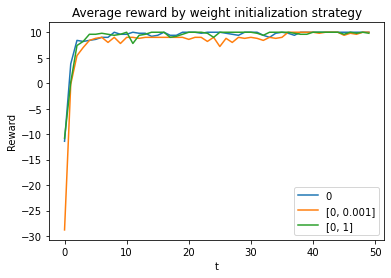

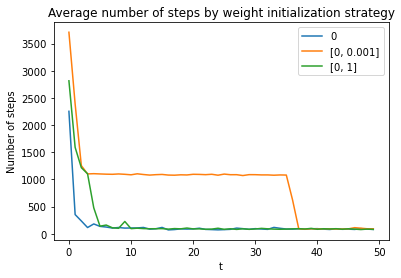

In [115]:
import matplotlib.pyplot as plt
for result in d:
    plt.plot(range(50), np.mean(result['rewards'], axis=0))
# show a legend on the plot
plt.title('Average reward by weight initialization strategy')
plt.xlabel('t')
plt.ylabel('Reward')
plt.legend(['0', '[0, 0.001]', '[0, 1]'])
# Display a figure.
plt.show()
import matplotlib.pyplot as plt
for result in d:
    plt.plot(range(50), np.mean(result['numSteps'], axis=0))
# show a legend on the plot
plt.title('Average number of steps by weight initialization strategy')
plt.xlabel('t')
plt.ylabel('Number of steps')
plt.legend(['0', '[0, 0.001]', '[0, 1]'])
# Display a figure.
plt.show()